# SC1015 Group 1 - Colin, Jonathan, Joel

### Our main goal of this project is to analyze the relevant numeric and categorical variables in the dataset "University Graduate Starting Income" taken from data.gov.sg. 

### The dataset includes information of the starting salary and employment rate of students from 6 universities in Singapore from 2013 - 2019. 

#### The problem we would like to explore is as follows: 

#### Sally has just received her A Level results. She has scored well and has no issues of applying to any local university of her choice. Sally is feeling overwhelmed by the numerous options available to her, so she wants to carefully weigh all her options before coming to a decision. To add on to her consideration factors, her parents are encouraging her to enrol in NUS but she was rather impressed by the newer, under-established schools such as SUTD during the recent open house.

#### To help Sally with her decision, we have taken data of post-graduates from 2013-2019 and intend to explore on the following: 

## Does entering a top university (NUS, NTU, SMU) guarantee the best career prospects? 

In [5]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
salarydata = pd.read_csv('salary.csv')
salarydata.head(n = 30)

,year,university,school,degree,stem,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,False,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),False,97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),False,90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,False,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,True,95.3,95.3,3494,3500,3536,3500,3100,3816
5,2013,Nanyang Technological University,College of Engineering,Bioengineering,True,81.3,68.8,2952,2900,3166,3125,2893,3365
6,2013,Nanyang Technological University,College of Engineering,Chemical and Biomolecular Engineering,True,87.3,85.1,3235,3000,3377,3200,3000,3800
7,2013,Nanyang Technological University,College of Engineering,Computer Engineering,True,90.3,88.2,3326,3100,3374,3175,3000,3600
8,2013,Nanyang Technological University,College of Engineering,Civil Engineering,True,94.8,93.8,3091,3000,3182,3100,3000,3380
9,2013,Nanyang Technological University,College of Engineering,Computer Science,True,92.1,88.5,3249,3000,3306,3125,3000,3600


In [7]:
salarydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       847 non-null    int64 
 1   university                 847 non-null    object
 2   school                     847 non-null    object
 3   degree                     847 non-null    object
 4   stem                       847 non-null    bool  
 5   employment_rate_overall    847 non-null    object
 6   employment_rate_ft_perm    847 non-null    object
 7   basic_monthly_mean         847 non-null    object
 8   basic_monthly_median       847 non-null    object
 9   gross_monthly_mean         847 non-null    object
 10  gross_monthly_median       847 non-null    object
 11  gross_mthly_25_percentile  847 non-null    object
 12  gross_mthly_75_percentile  847 non-null    object
dtypes: bool(1), int64(1), object(11)
memory usage: 80.4+ KB


In [8]:
print("Data type: ", type(salarydata))
print("Data dims: ", salarydata.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (847, 13)


In [9]:
salarydata = salarydata[salarydata["employment_rate_overall"] != 'na']

salarydata = salarydata.astype({'employment_rate_overall':float, 'employment_rate_ft_perm':float, 'basic_monthly_mean':int, 'basic_monthly_median':int, 'gross_monthly_mean':int, 'gross_monthly_median':int, 'gross_mthly_25_percentile':int, 'gross_mthly_75_percentile':int})
salarydata.head(30)

,year,university,school,degree,stem,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,False,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),False,97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),False,90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,False,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,True,95.3,95.3,3494,3500,3536,3500,3100,3816
5,2013,Nanyang Technological University,College of Engineering,Bioengineering,True,81.3,68.8,2952,2900,3166,3125,2893,3365
6,2013,Nanyang Technological University,College of Engineering,Chemical and Biomolecular Engineering,True,87.3,85.1,3235,3000,3377,3200,3000,3800
7,2013,Nanyang Technological University,College of Engineering,Computer Engineering,True,90.3,88.2,3326,3100,3374,3175,3000,3600
8,2013,Nanyang Technological University,College of Engineering,Civil Engineering,True,94.8,93.8,3091,3000,3182,3100,3000,3380
9,2013,Nanyang Technological University,College of Engineering,Computer Science,True,92.1,88.5,3249,3000,3306,3125,3000,3600


In [10]:
salarydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 846
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       759 non-null    int64  
 1   university                 759 non-null    object 
 2   school                     759 non-null    object 
 3   degree                     759 non-null    object 
 4   stem                       759 non-null    bool   
 5   employment_rate_overall    759 non-null    float64
 6   employment_rate_ft_perm    759 non-null    float64
 7   basic_monthly_mean         759 non-null    int32  
 8   basic_monthly_median       759 non-null    int32  
 9   gross_monthly_mean         759 non-null    int32  
 10  gross_monthly_median       759 non-null    int32  
 11  gross_mthly_25_percentile  759 non-null    int32  
 12  gross_mthly_75_percentile  759 non-null    int32  
dtypes: bool(1), float64(2), int32(6), int64(1), object

## Data preparation

#### Stem vs Non Stem dataframes

In [11]:
stem_df = salarydata.loc[salarydata['stem'] == True]

stem_df.head(30)

,year,university,school,degree,stem,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,True,95.3,95.3,3494,3500,3536,3500,3100,3816
5,2013,Nanyang Technological University,College of Engineering,Bioengineering,True,81.3,68.8,2952,2900,3166,3125,2893,3365
6,2013,Nanyang Technological University,College of Engineering,Chemical and Biomolecular Engineering,True,87.3,85.1,3235,3000,3377,3200,3000,3800
7,2013,Nanyang Technological University,College of Engineering,Computer Engineering,True,90.3,88.2,3326,3100,3374,3175,3000,3600
8,2013,Nanyang Technological University,College of Engineering,Civil Engineering,True,94.8,93.8,3091,3000,3182,3100,3000,3380
9,2013,Nanyang Technological University,College of Engineering,Computer Science,True,92.1,88.5,3249,3000,3306,3125,3000,3600
10,2013,Nanyang Technological University,College of Engineering,Electrical and Electronic Engineering,True,91.0,88.7,3133,3000,3187,3100,3000,3440
11,2013,Nanyang Technological University,College of Engineering,Environmental Engineering,True,84.0,81.5,3091,3000,3140,3000,3000,3300
12,2013,Nanyang Technological University,College of Engineering,Information Engineering and Media,True,85.7,79.6,3160,3150,3203,3200,2950,3400
13,2013,Nanyang Technological University,College of Engineering,Materials Engineering,True,82.5,78.9,2989,3000,3096,3000,2800,3300


In [12]:
nonStem_df = salarydata.loc[salarydata['stem'] == False]

nonStem_df.head(30)

,year,university,school,degree,stem,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,False,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),False,97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),False,90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,False,87.5,87.5,3557,3400,3615,3400,3000,4100
16,2013,Nanyang Technological University,"College of Humanities, Arts & Social Sciences","Art, Design & Media",False,81.6,61.4,2639,2500,2638,2500,2300,2900
17,2013,Nanyang Technological University,"College of Humanities, Arts & Social Sciences",Chinese,False,85.1,80.5,2818,2800,2924,3000,2600,3300
18,2013,Nanyang Technological University,"College of Humanities, Arts & Social Sciences",Communication Studies,False,89.4,79.6,2893,2930,2956,3000,2700,3250
19,2013,Nanyang Technological University,"College of Humanities, Arts & Social Sciences",Economics,False,89.9,83.5,3085,3000,3148,3000,2800,3545
20,2013,Nanyang Technological University,"College of Humanities, Arts & Social Sciences",English,False,82.7,67.3,3087,3000,3179,3100,2800,3400
21,2013,Nanyang Technological University,"College of Humanities, Arts & Social Sciences",Linguistics and Multilingual Studies,False,90.6,81.3,2691,2600,2725,2625,2475,3018


#### Top Uni vs Non Top Uni dataframes

In [13]:
NTU_df = salarydata.loc[salarydata['university'] == 'Nanyang Technological University'] 
NUS_df = salarydata.loc[salarydata['university'] == 'Nanyang Technological University']
SMU_df = salarydata.loc[salarydata['university'] == 'Singapore Management University'] 

top_uni = SMU_df.append([NTU_df,NUS_df] ,ignore_index=True)
top_uni.head(30)

,year,university,school,degree,stem,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Singapore Management University,School of Accountancy (4-years programme) *,Accountancy (4-years programme),False,94.2,93.2,3231,2800,3342,2825,2700,3430
1,2013,Singapore Management University,School of Accountancy (4-years programme) *,Accountancy (4-years programme) Cum Laude and ...,False,95.2,95.2,3580,2900,3634,3000,2700,3750
2,2013,Singapore Management University,School of Business (4-years programme) *,Business Management (4-years programme),False,93.2,87.3,3344,3000,3520,3200,2800,3750
3,2013,Singapore Management University,School of Business (4-years programme) *,Business Management (4-years programme) Cum La...,False,95.9,93.8,3825,3500,3975,3580,3000,4100
4,2013,Singapore Management University,School of Economics (4-years programme) *,Economics (4-years programme),False,90.6,88.6,3389,3200,3513,3339,3000,3800
5,2013,Singapore Management University,School of Economics (4-years programme) *,Economics (4-years programme) Cum Laude and above,False,94.0,94.0,3731,3500,3820,3600,3250,4000
6,2013,Singapore Management University,School of Information Systems (4-years program...,Information Systems Management (4-years progra...,True,93.6,89.5,3389,3300,3468,3300,3000,3800
7,2013,Singapore Management University,School of Information Systems (4-years program...,Information Systems Management (4-years progra...,True,100.0,90.9,3786,3725,3862,3800,3500,4000
8,2013,Singapore Management University,School of Social Sciences (4-years programme) *,Social Sciences (4-years programme),False,86.5,79.8,3122,3000,3150,3000,2600,3320
9,2013,Singapore Management University,School of Social Sciences (4-years programme) *,Social Sciences (4-years programme) Cum Laude ...,False,87.5,83.3,3251,3200,3267,3200,2800,3781


In [14]:
topstem_df = top_uni.loc[top_uni['stem'] == True]

topstem_df.head(30)

,year,university,school,degree,stem,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
6,2013,Singapore Management University,School of Information Systems (4-years program...,Information Systems Management (4-years progra...,True,93.6,89.5,3389,3300,3468,3300,3000,3800
7,2013,Singapore Management University,School of Information Systems (4-years program...,Information Systems Management (4-years progra...,True,100.0,90.9,3786,3725,3862,3800,3500,4000
18,2014,Singapore Management University,School of Information Systems (4-year programm...,Information Systems Management (4-year programme),True,92.9,80.6,3431,3225,3530,3350,3000,4000
19,2014,Singapore Management University,School of Information Systems (4-year programm...,Information Systems Management (4-year program...,True,97.4,84.2,4057,4000,4151,4050,3500,4540
30,2015,Singapore Management University,School of Information Systems (4-year programm...,Information Systems Management,True,94.8,85.9,3491,3500,3660,3500,3200,4110
31,2015,Singapore Management University,School of Information Systems (4-year programm...,Information Systems Management Cum Laude and a...,True,97.4,92.1,3577,3800,3834,3800,3500,4166
42,2016,Singapore Management University,School of Information Systems (4-year programm...,Information Systems Management,True,95.7,91.5,3837,3500,3897,3600,3200,4167
43,2016,Singapore Management University,School of Information Systems (4-year programm...,Information Systems Management Cum Laude and a...,True,97.5,95.0,4504,4167,4603,4167,3800,4750
54,2017,Singapore Management University,School of Information Systems (4-years program...,Information Systems Management,True,95.1,91.3,3922,3905,4014,4000,3550,4500
55,2017,Singapore Management University,School of Information Systems (4-years program...,Information Systems Management Cum Laude and a...,True,96.1,94.1,4211,4334,4305,4334,4000,4750


In [15]:
SIT_df = salarydata.loc[salarydata['university'] == 'Singapore Institute of Technology'] 
SUTD_df = salarydata.loc[salarydata['university'] == 'Singapore University of Technology and Design']
SUSS_df = salarydata.loc[salarydata['university'] == 'Singapore University of Social Sciences'] 

nontop_uni = SIT_df.append([SUTD_df,SUSS_df] ,ignore_index=True)
nontop_uni.head(30)

,year,university,school,degree,stem,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2014,Singapore Institute of Technology,DigiPen Institute of Technology,Bachelor of Arts in Game Design,False,100.0,86.7,2490,2700,2490,2700,2575,2800
1,2014,Singapore Institute of Technology,DigiPen Institute of Technology,Bachelor of Fine Arts in Digital Arts & Animation,False,90.6,84.4,2586,2600,2603,2600,2300,2885
2,2014,Singapore Institute of Technology,DigiPen Institute of Technology,Bachelor of Science in Computer Science & Game...,True,100.0,100.0,2932,2875,2955,2975,2800,3075
3,2014,Singapore Institute of Technology,DigiPen Institute of Technology,Bachelor of Science in Computer Science in Rea...,True,100.0,100.0,2859,3000,2910,3000,2700,3300
4,2014,Singapore Institute of Technology,The Glasgow School of Art,Bachelor of Arts with Honours in Communication...,False,89.1,78.3,2547,2500,2595,2500,2400,2800
5,2014,Singapore Institute of Technology,The Glasgow School of Art,Bachelor of Arts with Honours in Interior Design,False,93.9,90.9,2553,2500,2583,2500,2373,2800
6,2014,Singapore Institute of Technology,Newcastle University,Bachelor of Engineering with Honours in Chemic...,True,90.1,84.5,3041,3000,3325,3300,3000,3650
7,2014,Singapore Institute of Technology,Newcastle University,Bachelor of Engineering with Honours in Marine...,True,92.6,88.9,3208,3100,3334,3260,3003,3594
8,2014,Singapore Institute of Technology,Newcastle University,Bachelor of Engineering with Honours in Mechan...,True,97.1,85.7,3196,3000,3273,3100,3000,3338
9,2014,Singapore Institute of Technology,Newcastle University,Bachelor of Engineering with Honours in Naval ...,False,100.0,94.1,3293,3355,3467,3500,3233,3675


In [16]:
nontopstem_df = nontop_uni.loc[nontop_uni['stem'] == True]

nontopstem_df.head(30)

,year,university,school,degree,stem,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
2,2014,Singapore Institute of Technology,DigiPen Institute of Technology,Bachelor of Science in Computer Science & Game...,True,100.0,100.0,2932,2875,2955,2975,2800,3075
3,2014,Singapore Institute of Technology,DigiPen Institute of Technology,Bachelor of Science in Computer Science in Rea...,True,100.0,100.0,2859,3000,2910,3000,2700,3300
6,2014,Singapore Institute of Technology,Newcastle University,Bachelor of Engineering with Honours in Chemic...,True,90.1,84.5,3041,3000,3325,3300,3000,3650
7,2014,Singapore Institute of Technology,Newcastle University,Bachelor of Engineering with Honours in Marine...,True,92.6,88.9,3208,3100,3334,3260,3003,3594
8,2014,Singapore Institute of Technology,Newcastle University,Bachelor of Engineering with Honours in Mechan...,True,97.1,85.7,3196,3000,3273,3100,3000,3338
10,2014,Singapore Institute of Technology,Newcastle University,Bachelor of Engineering with Honours in Offsho...,True,91.3,91.3,3311,3200,3467,3300,3075,3625
12,2014,Singapore Institute of Technology,Technische Universität München,Bachelor of Science in Chemical Engineering,True,86.7,86.7,2954,2900,3285,3200,2950,3755
13,2014,Singapore Institute of Technology,Technische Universität München,Bachelor of Science in Electrical Engineering ...,True,85.7,82.1,3072,2900,3141,3000,2800,3480
15,2014,Singapore Institute of Technology,Trinity College Dublin,Bachelor in Science (Occupational Therapy),True,100.0,100.0,3127,3100,3151,3100,3000,3338
16,2014,Singapore Institute of Technology,Trinity College Dublin,Bachelor in Science (Physiotherapy),True,100.0,100.0,3204,3200,3229,3200,3000,3500


## Explanatory Analysis 

#### How Top Universities compare to Non-Top Universities

<AxesSubplot:>

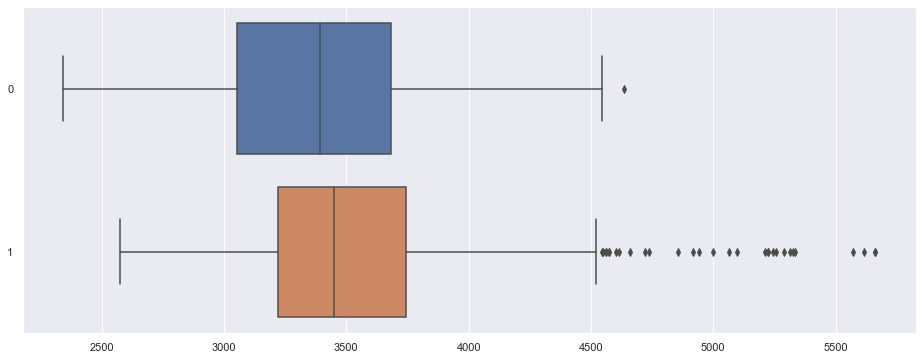

In [17]:
f = plt.figure(figsize=(16,6))
sb.boxplot(data=[nontop_uni["gross_monthly_mean"], top_uni["gross_monthly_mean"]], orient='h')

<AxesSubplot:>

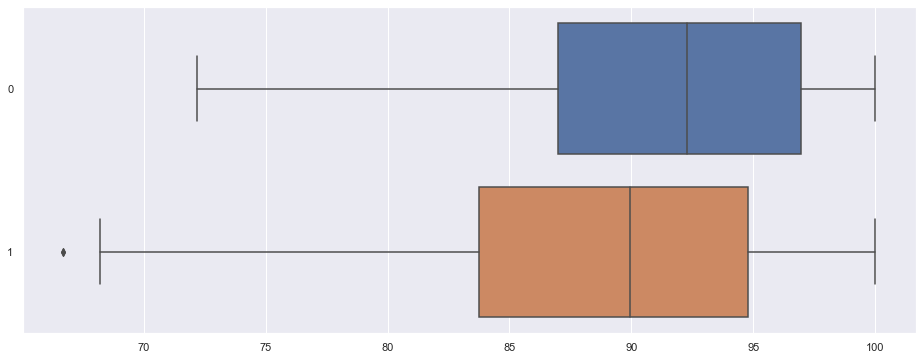

In [19]:
f = plt.figure(figsize=(16,6))
sb.boxplot(data=[nontop_uni["employment_rate_overall"], top_uni["employment_rate_overall"]], orient='h')

 From the initial exploratory data analysis, we are unable to conclude that graduates from the top universities perform better. 

The mean of gross monthly salary for top_uni vs nontop_uni is relatively equal, and the mean of employment for top_uni is in fact lower than of nontop_uni.

## Further Analysis

#### How STEM affects income: Gross monthly income vs Stem

X: Gross monthly mean ; Y: Stem (T/F)

<AxesSubplot:xlabel='gross_monthly_mean', ylabel='stem'>

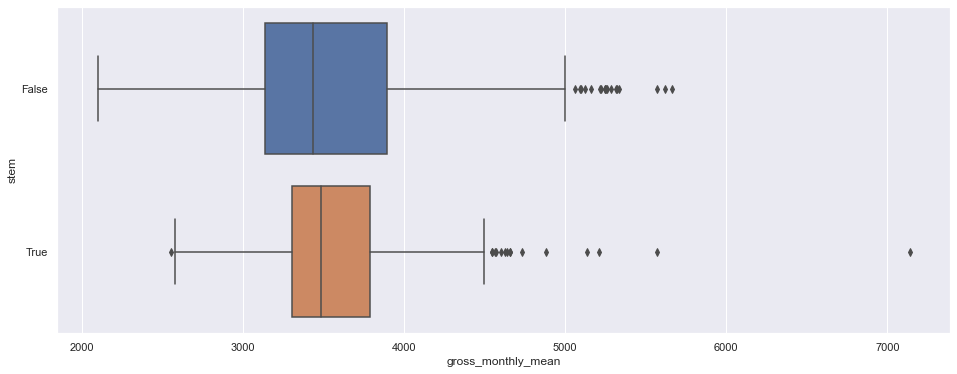

In [84]:
f = plt.figure(figsize=(16, 6))
sb.boxplot(x = 'gross_monthly_mean', y = 'stem', data = salarydata, orient = 'h')

Insights: Student studying STEM has a higher Mean Gross Monthly Income than those Non-STEM students.
Those Non-Stem students has a larger Min-Max Range of Gross Monthly Income compared to Stem studnets (wider range).

<AxesSubplot:>

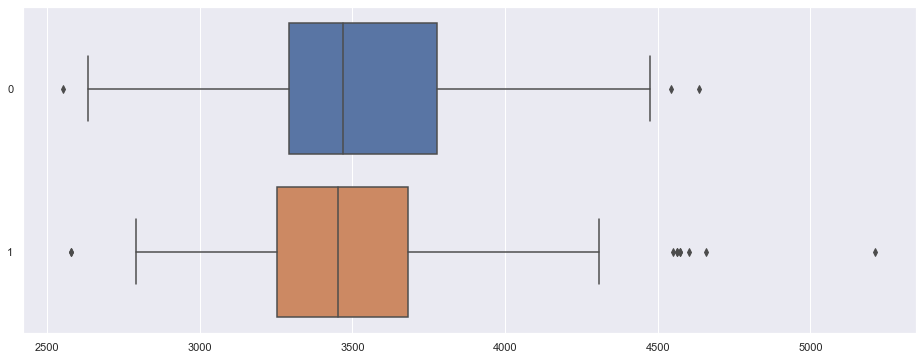

In [85]:
f = plt.figure(figsize=(16, 6))
sb.boxplot(data=[nontopstem_df["gross_monthly_mean"], topstem_df["gross_monthly_mean"]], orient='h')

Surprisingly, Non Top Stem students has a slightly higher gross monthly mean and a higher 75th percentile than Top Stem students. Non Top Stem students generally enjoy a higher gross monthly mean based on the boxplot above.

<AxesSubplot:>

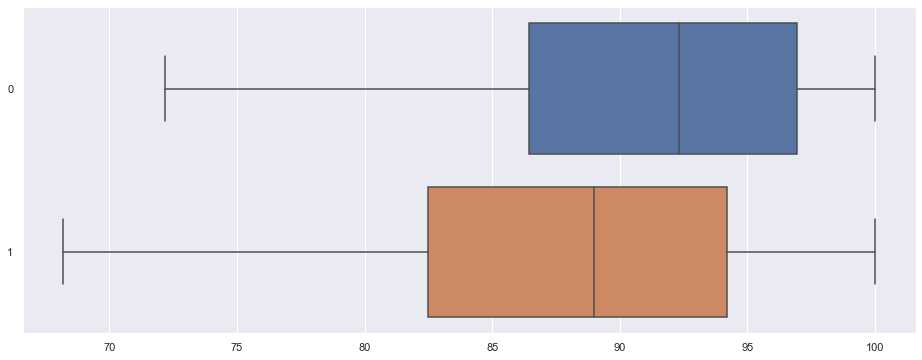

In [86]:
f = plt.figure(figsize=(16, 6))
sb.boxplot(data=[nontopstem_df["employment_rate_overall"], topstem_df["employment_rate_overall"]], orient='h')

The employment rate for Non Top Stem students has a higher mean than the employment rate of Top Stem students. Also, the employment rate for Non Top Stem students has a higher 75 percentile compared to Top stem students. This can conclude that students from Non Top Stem courses has a generally higher employment rate.

## Machine Learning

## Classification Tree

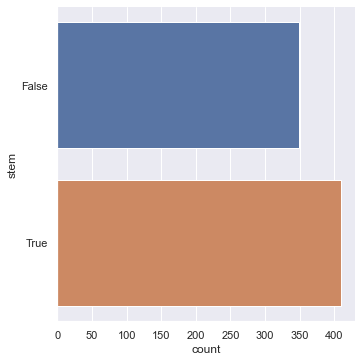

In [21]:
sb.catplot(y = 'stem', data = salarydata, kind = "count")

In [22]:
countY, countX = salarydata.stem.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)

Ratio of classes is Y : N =  410 : 349


<AxesSubplot:xlabel='gross_monthly_mean', ylabel='stem'>

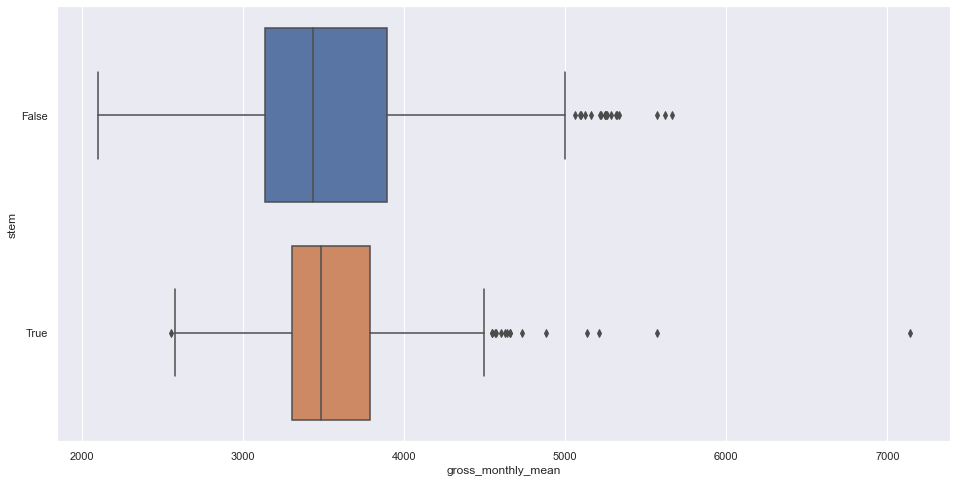

In [23]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'gross_monthly_mean', y = 'stem', data = salarydata, orient='h')

In [24]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
# you can change the max_depth as you wish

# Decision Tree with max depth = 2
tree2 = DecisionTreeClassifier(max_depth = 2)

# Decision Tree with max depth = 3
tree3 = DecisionTreeClassifier(max_depth = 3)

In [25]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(salarydata['stem'])
X = pd.DataFrame(salarydata['gross_monthly_mean'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (607, 1) (607, 1)
Test Set  : (152, 1) (152, 1)


In [26]:
# Fit the tree with max depth 2
tree2.fit(X_train, y_train)

# Fit the tree with max depth 3
tree3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Max depth = 2

[Text(334.8, 543.6, 'gross_monthly_mean <= 3168.5\ngini = 0.496\nsamples = 607\nvalue = [278, 329]\nclass = S'),
 Text(167.4, 326.16, 'gross_monthly_mean <= 2694.5\ngini = 0.439\nsamples = 123\nvalue = [83, 40]\nclass = NS'),
 Text(83.7, 108.72000000000003, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]\nclass = NS'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.46\nsamples = 106\nvalue = [68, 38]\nclass = NS'),
 Text(502.20000000000005, 326.16, 'gross_monthly_mean <= 4052.5\ngini = 0.481\nsamples = 484\nvalue = [195, 289]\nclass = S'),
 Text(418.5, 108.72000000000003, 'gini = 0.451\nsamples = 387\nvalue = [133, 254]\nclass = S'),
 Text(585.9, 108.72000000000003, 'gini = 0.461\nsamples = 97\nvalue = [62, 35]\nclass = NS')]

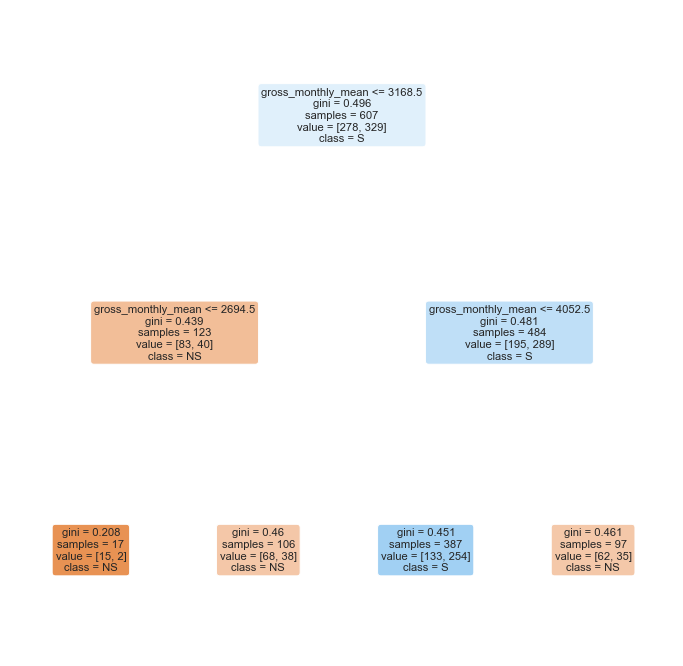

In [27]:
# Plot the tree with max depth 2
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(tree2, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["NS","S"])

#### Train Data

<AxesSubplot:>

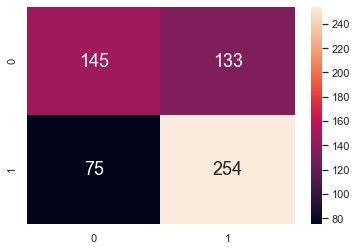

In [28]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = tree2.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [29]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", tree2.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.657331136738056

TPR Train :	 0.7720364741641338
TNR Train :	 0.5215827338129496

FPR Train :	 0.4784172661870504
FNR Train :	 0.22796352583586627


#### Test Data

<AxesSubplot:>

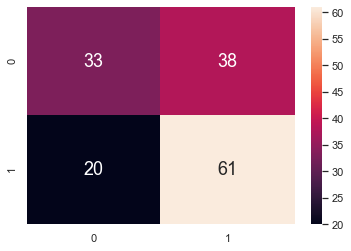

In [30]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = tree2.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [31]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree2.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.618421052631579

TPR Test :	 0.7530864197530864
TNR Test :	 0.4647887323943662

FPR Test :	 0.5352112676056338
FNR Test :	 0.24691358024691357


### Max depth = 3

[Text(669.6, 570.7800000000001, 'gross_monthly_mean <= 3168.5\ngini = 0.496\nsamples = 607\nvalue = [278, 329]\nclass = S'),
 Text(334.8, 407.70000000000005, 'gross_monthly_mean <= 2694.5\ngini = 0.439\nsamples = 123\nvalue = [83, 40]\nclass = NS'),
 Text(167.4, 244.62, 'gross_monthly_mean <= 2580.0\ngini = 0.208\nsamples = 17\nvalue = [15, 2]\nclass = NS'),
 Text(83.7, 81.53999999999996, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = NS'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = NS'),
 Text(502.20000000000005, 244.62, 'gross_monthly_mean <= 3153.0\ngini = 0.46\nsamples = 106\nvalue = [68, 38]\nclass = NS'),
 Text(418.5, 81.53999999999996, 'gini = 0.468\nsamples = 99\nvalue = [62, 37]\nclass = NS'),
 Text(585.9, 81.53999999999996, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = NS'),
 Text(1004.4000000000001, 407.70000000000005, 'gross_monthly_mean <= 4052.5\ngini = 0.481\nsamples = 484\nvalue = [195, 289]\nclass = S'),


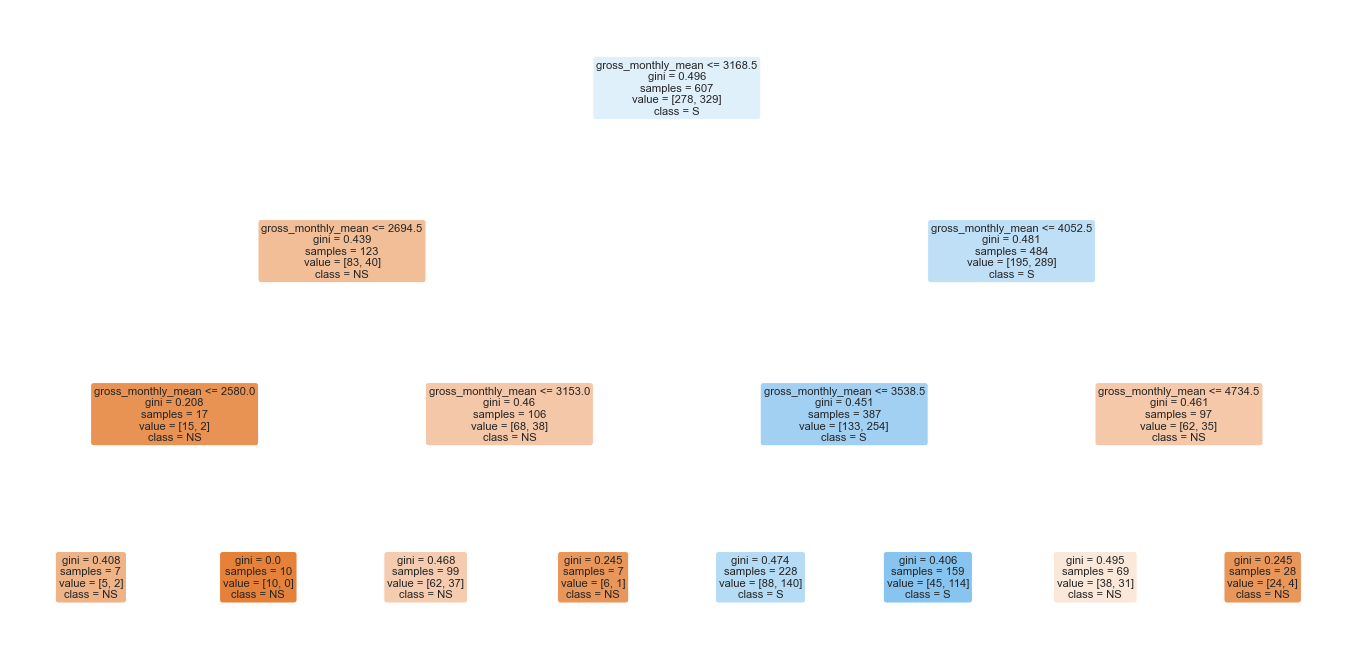

In [32]:
# Plot the tree with max depth 3
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,12))
plot_tree(tree3, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["NS","S"])

#### Train Data

<AxesSubplot:>

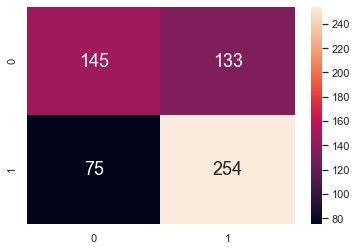

In [33]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = tree3.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [34]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", tree3.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.657331136738056

TPR Train :	 0.7720364741641338
TNR Train :	 0.5215827338129496

FPR Train :	 0.4784172661870504
FNR Train :	 0.22796352583586627


#### Test Data

<AxesSubplot:>

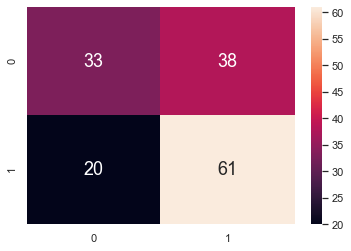

In [35]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = tree3.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [36]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", tree3.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.618421052631579

TPR Test :	 0.7530864197530864
TNR Test :	 0.4647887323943662

FPR Test :	 0.5352112676056338
FNR Test :	 0.24691358024691357


## Random Forest Classifier

In [37]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
X = salarydata[['gross_monthly_mean', 'employment_rate_overall']]
y = salarydata['stem']

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [39]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4646929824561403
Mean Squared Error: 0.3034359009502924
Root Mean Squared Error: 0.5508501619771863


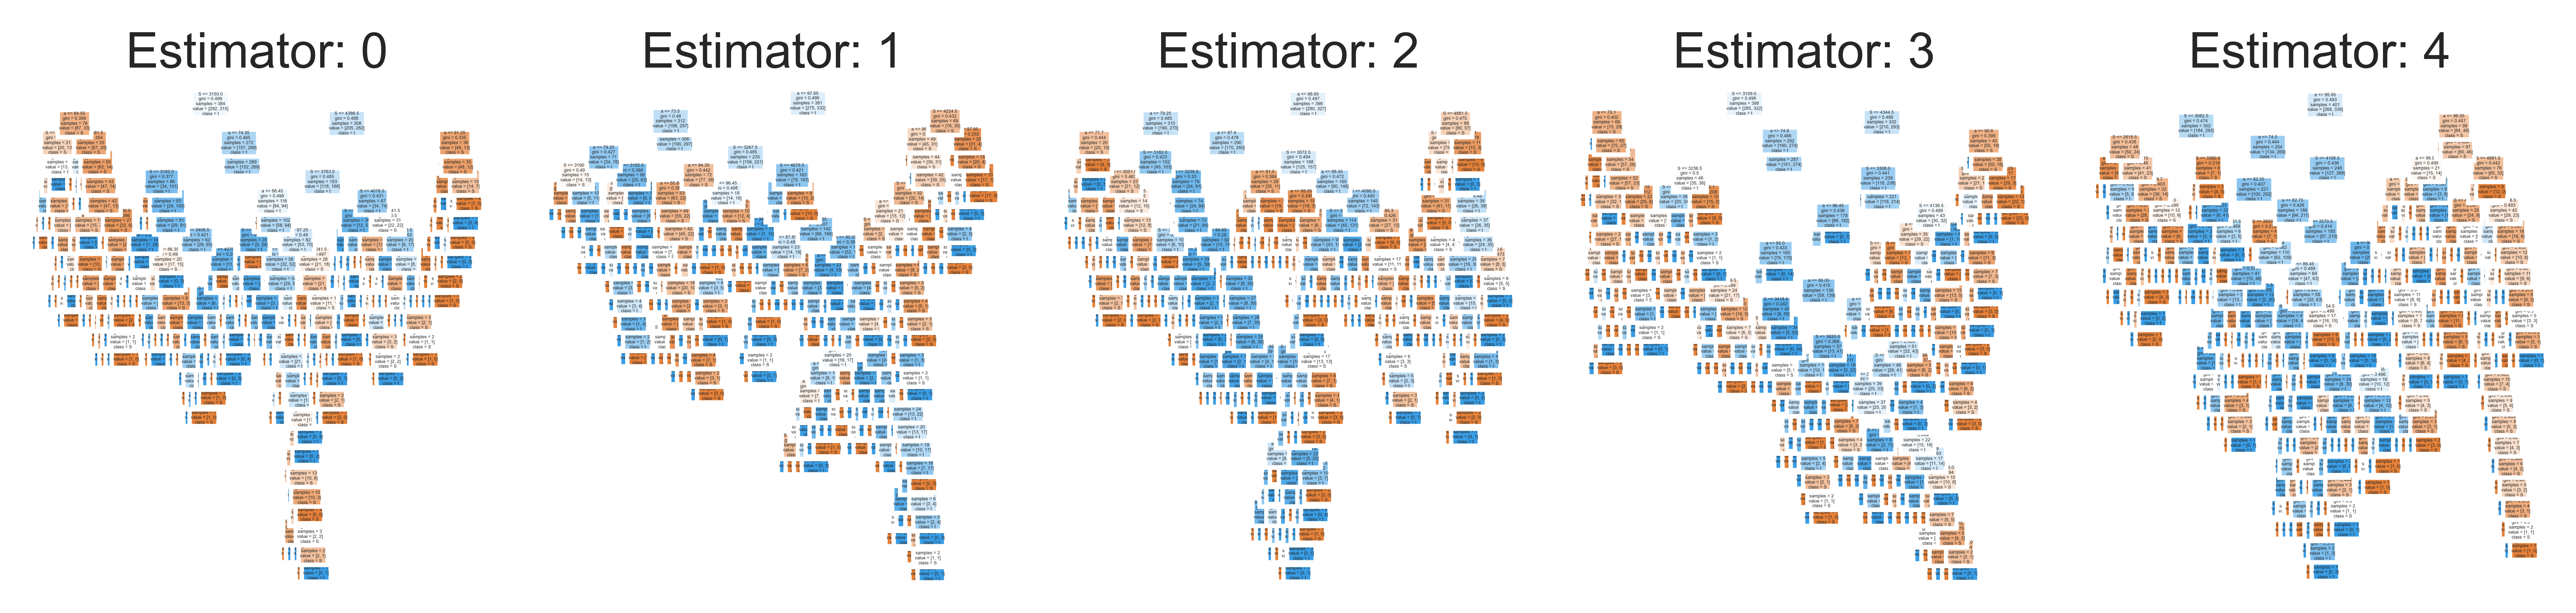

In [43]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = "Salary", 
                   class_names= "Stem",
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

The first 5 classification trees of the random forest classifier.

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_pred

array([ True, False,  True,  True, False, False,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,

STEM prediction of the test data based on the gross_monthly_mean and employment_rate_overall.

In [42]:
count = 0
for item in y_test:
    count += 1
    print(item, end=", ")
    if count % 9 == 0:
        print("\n")

True, False, True, False, True, False, True, False, False, 

False, False, True, False, True, False, True, True, False, 

True, False, True, True, True, True, True, True, True, 

True, False, True, False, True, False, False, False, False, 

False, True, False, True, False, True, True, True, True, 

True, True, False, True, True, True, False, False, True, 

True, True, False, True, False, True, False, True, False, 

True, True, True, False, False, True, False, True, True, 

False, False, True, True, False, True, True, True, True, 

False, True, False, True, True, False, False, True, True, 

False, True, False, True, True, False, False, True, True, 

False, True, True, True, False, False, False, True, False, 

False, True, False, True, False, True, True, True, False, 

True, False, True, True, False, False, False, False, True, 

False, False, False, False, True, True, True, True, False, 

False, True, True, False, True, True, True, True, False, 

True, False, False, False, False, False, 

Actual STEM results for the test data.

<AxesSubplot:>

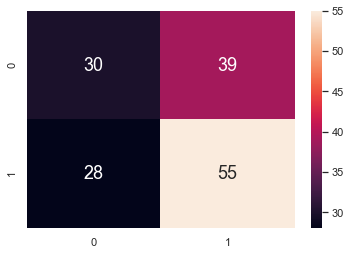

In [44]:
# Generate random forest confusion matrix
from sklearn.metrics import confusion_matrix

sb.heatmap(confusion_matrix(y_test, rf_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [45]:
# Print the Classification Accuracy
print("Test Data")

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
TPR Test :	 0.5903614457831325
TNR Test :	 0.2753623188405797

FPR Test :	 0.7246376811594203
FNR Test :	 0.40963855421686746


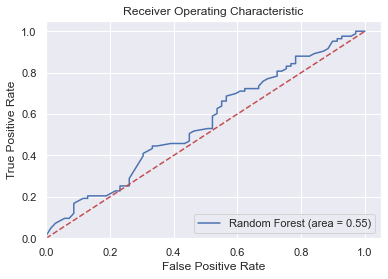

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC AUC curve shows how well the model is able to seperate the different classes accurately. A score of 0.59 indicates that it is 59% accurate in determining if a course is under STEM or non-STEM.

# Data-driven Insights

From this, we can conclude that the random forest classifier is a better technique than the classification tree due to its complexity in handling large volumes of data. Where the classification tree excels is its visualisation abilities as it is impossible to visualise all the trees considered as part of the random forest. 